In [71]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [72]:
# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone2.csv")
# 데이터의 컬럼명 변경
print(df.head())

      Ozone  Result     Solar.R  Wind  Temp  Month  Day
0  41.00000       0  190.000000   7.4    67      5    1
1  36.00000       0  118.000000   8.0    72      5    2
2  12.00000       0  149.000000  12.6    74      5    3
3  18.00000       0  313.000000  11.5    62      5    4
4  42.12931       0  185.931507  14.3    56      5    5


In [73]:
df.columns

Index(['Ozone', 'Result', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [74]:
df.shape

(153, 7)

In [75]:
df.describe()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,0.287582,185.931507,9.957516,77.882353,6.993464,15.803922
std,28.693372,0.454122,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,0.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,21.000000,0.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,42.129310,0.000000,194.000000,9.700000,79.000000,7.000000,16.000000
75%,46.000000,1.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,168.000000,1.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [76]:
#오존량 분류를 기준으로 한 평균값들
df.groupby("Result").mean()

,Ozone,Solar.R,Wind,Temp,Month,Day
Result,,,,,,
0,28.108115,174.116124,10.926606,74.440367,6.761468,15.678899
1,76.863636,215.201432,7.556818,86.409091,7.568182,16.113636


Text(0, 0.5, '빈도')

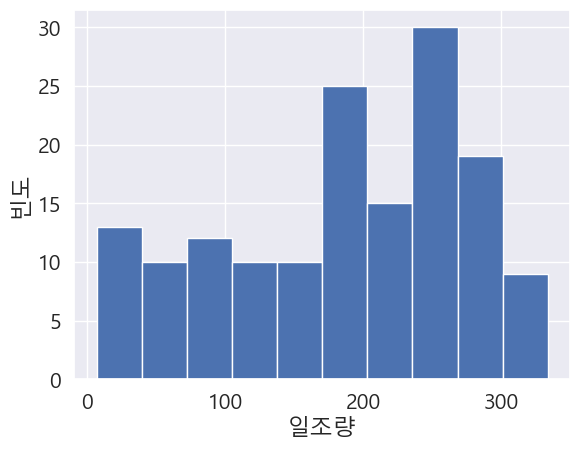

In [77]:
%matplotlib inline
df["Solar.R"].hist()
plt.xlabel('일조량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

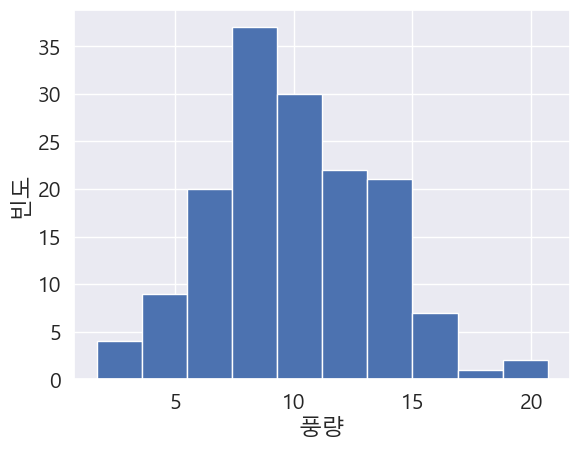

In [78]:
%matplotlib inline
df["Wind"].hist()
plt.xlabel('풍량')
plt.ylabel('빈도')

0    109
1     44
Name: Result, dtype: int64

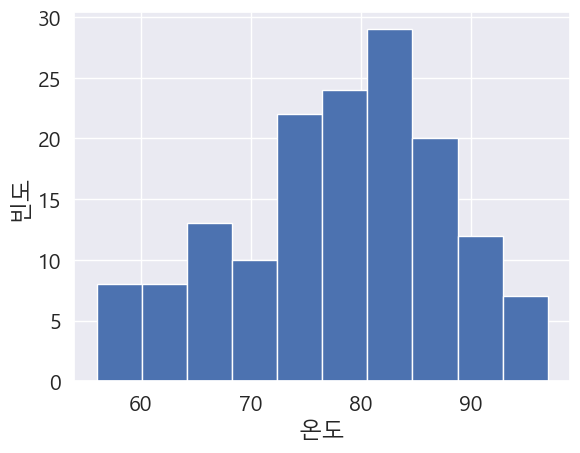

In [79]:
%matplotlib inline
df["Temp"].hist()
plt.xlabel('온도')
plt.ylabel('빈도')
df["Result"].value_counts()

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족 || 1: 정상)')

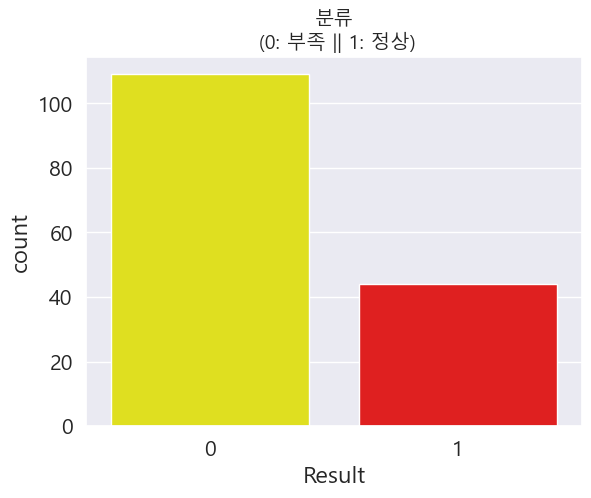

In [80]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족 || 1: 정상)', fontsize=14)
#불균형 데이터셋

In [91]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["Result"].value_counts()

0    44
1    44
Name: Result, dtype: int64

In [82]:
#오버샘플링
from imblearn.over_sampling import SMOTE
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']
X_sample,y_sample = SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["Result"].value_counts()

0    109
1    109
Name: Result, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


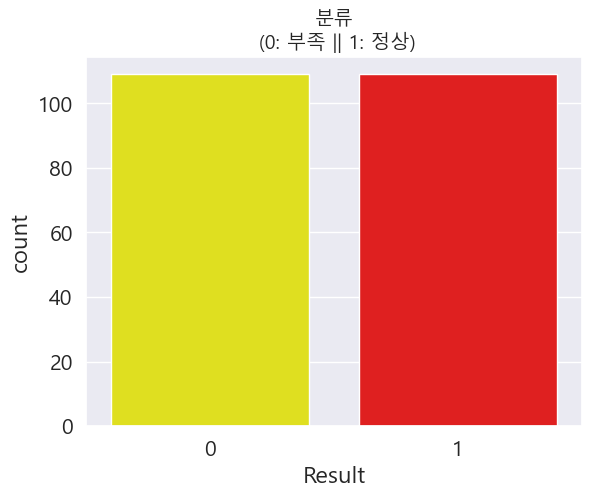

In [83]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Result', data=df2, palette=colors)
plt.title('분류\n (0: 부족 || 1: 정상)', fontsize=14)
cols=['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']

In [84]:
import statsmodels.api as sm
#특정한 변수에서 값의 비율이 너무 낮은 경우 에러가 발생할 수 있음
#model=sm.Logit(y,X,method='bfgs')
model=sm.Logit(y,X)
result=model.fit()
#summary()에 표현되지 않는 값이 있을 경우 summary2() 사용
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.461756
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.334     
Dependent Variable: Result           AIC:              207.3255  
Date:               2023-03-30 14:51 BIC:              217.4790  
No. Observations:   218              Log-Likelihood:   -100.66   
Df Model:           2                LL-Null:          -151.11   
Df Residuals:       215              LLR p-value:      1.2380e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Solar.R    0.0045     0.0024    1.8553   0.0636   -0.0003    0.0093
Wind      -0.4994     0.0694   -7.1964   0.0000   -0.6354 

In [85]:
#pvalue가 0.05보다 큰 값들을 제거
cols=['Wind', 'Temp']
X=X_samp[cols]
y=y_samp['Result']
df2=pd.concat([X,y],axis=1)

In [86]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.469920
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.322     
Dependent Variable: Result           AIC:              208.8850  
Date:               2023-03-30 14:51 BIC:              215.6539  
No. Observations:   218              Log-Likelihood:   -102.44   
Df Model:           1                LL-Null:          -151.11   
Df Residuals:       216              LLR p-value:      5.8767e-23
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Wind      -0.4831     0.0672   -7.1885   0.0000   -0.6148   -0.3514
Temp       0.0551     0.0076    7.2031   0.0000    0.0401 

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.8390804597701149
검증용: 0.8409090909090909


In [88]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[21,  3],
       [ 4, 16]], dtype=int64)

In [89]:
df_cm=pd.DataFrame(cm, index=[0, 1],
columns=[0, 1])
df_cm

,0,1
0,21,3
1,4,16


<AxesSubplot:title={'center':'Confusion Matrix'}>

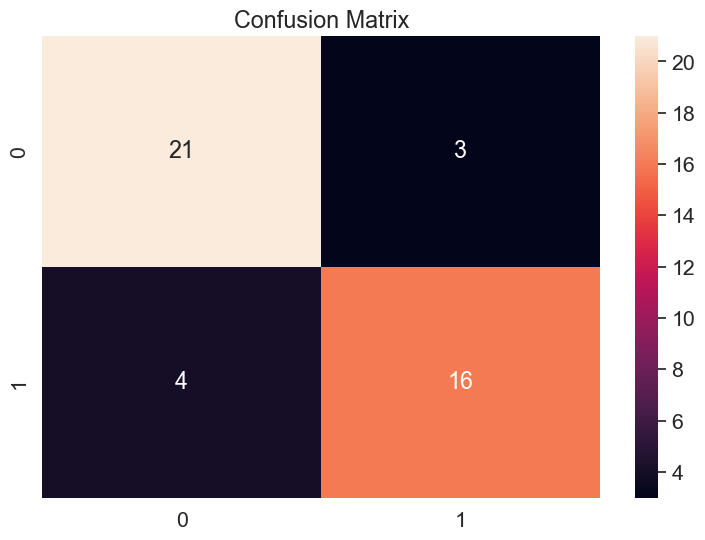

In [90]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자